In [1]:
#imports to be able to pull data and prepare it for us
import wrangle

#imports for needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydataset

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
    #import to be able to do decision tress
from sklearn.neighbors import KNeighborsClassifier
    #import to be able to do KNN
from sklearn.linear_model import LogisticRegression
    #import to be able to do logistic regression
from sklearn.ensemble import RandomForestClassifier
    #import to be able to do random forest

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = wrangle.acquire_game_sales()
df = wrangle.clean_game_sales(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 1 to 16600
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Platform              16327 non-null  object  
 1   Year                  16327 non-null  int64   
 2   Genre                 16327 non-null  object  
 3   Publisher             16327 non-null  object  
 4   Global_Sales          16327 non-null  float64 
 5   years_binned          16318 non-null  category
 6   level_of_success      16327 non-null  category
 7   Nintendo              16327 non-null  uint8   
 8   Playstation           16327 non-null  uint8   
 9   Xbox                  16327 non-null  uint8   
 10  Computer              16327 non-null  uint8   
 11  Sega                  16327 non-null  uint8   
 12  Other                 16327 non-null  uint8   
 13  Action_Adventure      16327 non-null  uint8   
 14  Simulation            16327 non-null  uint8   
 15  Sports 

In [4]:
df2 = wrangle.focused_game_sales(df)

In [5]:
train, validate, test = wrangle.split_game_sales(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [6]:
train2, validate2, test2 = wrangle.split_focused_game_sales(df2)
X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2 = wrangle.split_train_validate_test(train2, validate2, test2)

In [7]:
y_train.value_counts()

level_of_success    
Fairly Successful       3600
Moderate Success        3364
Extremely Successful    1278
Very Successful          900
dtype: int64

# Find the Baseline

In [8]:
baseline_accuracy = (train.level_of_success == 'Fairly Successful').mean()
print(f'My baseline accuracy is: \n', round(baseline_accuracy, 3))

0.394

# Linear Regression Models

## Logit 1 Model

In [9]:
logit1 = LogisticRegression(random_state=123)
# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit1.fit(X_train2, y_train2)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit1.predict(X_train2)

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using genre(s), platform(s), and years binned")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train2, y_train2)))

Baseline is 0.39
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.43


## Check out the Classification Report

In [10]:
print(classification_report(y_train2, y_pred))
# accuracy of .43 isnt great

                      precision    recall  f1-score   support

Extremely Successful       0.00      0.00      0.00      1278
   Fairly Successful       0.41      0.70      0.52      3600
    Moderate Success       0.45      0.41      0.43      3364
     Very Successful       0.00      0.00      0.00       900

            accuracy                           0.43      9142
           macro avg       0.22      0.28      0.24      9142
        weighted avg       0.33      0.43      0.36      9142



- There are four ways to check if the predictions are right or wrong:
1. TN / True Negative: 
    - the case was negative and predicted negative
2. TP / True Positive: 
    - the case was positive and predicted positive
3. FN / False Negative: 
    - the case was positive but predicted negative
4. FP / False Positive: 
    - the case was negative but predicted positive
- **Precision**
    - what percent of my predictions wer correct?
        - precision for Extremely Successful: 0
        - precision for Fairly Successful: 0.41
        - precision for Moderate Success: 0.45
        - precision for Very Successful: 0
- **Recall**
    - what percent of the postive cases did I catch?
        - recall for Extremely Successful: 0
        - recall for Fairly Successful: 0.7
        - recall for Moderate Success: 0.41
        - recall for Very Successful: 0
- **F1 score**
    - what percent of positive predictions were correct?
        - f1 score for Extremely Successful: 0
        - f1 score for Fairly Successful: 0.52
        - f1 score for Moderate Success: 0.43
        - f1 score for Very Successful: 0
    - what is the accuracy of the f1 score prediction?
        - 0.43

# Logit 2 Model

In [11]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train2, y_train2)

y_pred = logit2.predict(X_train2)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train2, y_train2)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.43


# Logit 3 Model

In [12]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train2, y_train2)

y_pred = logit3.predict(X_train2)

accuracy = logit3.score(X_train2, y_train2)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.32


## Takeaways:
- will not use this model because the accuracy is 0.32 while the previous 2 were are 0.43

# Model (Only Year)

In [13]:
features = ["Year"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Nintendo)

In [14]:
features = ["Nintendo"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.43


## Takeaways:
- This model has an accuracy the same as the first 2 models

# Model (Only Playstation)

In [15]:
features = ["Playstation"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Xbox)

In [16]:
features = ["Xbox"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Computer)

In [17]:
features = ["Computer"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Sega)

In [18]:
features = ["Sega"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Other)

In [19]:
features = ["Other"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Action_Adventure)

In [20]:
features = ["Action_Adventure"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.4


## Takeaways:
- will not use this model because the accuracy is 0.4 while the first 2 were are 0.43

# Model (Only Simulation)

In [21]:
features = ["Simulation"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Sports)

In [22]:
features = ["Sports"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Misc)

In [23]:
features = ["Misc"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Role_Playing)

In [24]:
features = ["Role_Playing"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Shooter)

In [25]:
features = ["Shooter"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

# Model (Only Strategy)

In [26]:
features = ["Strategy"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.39


## Takeaways:
- will not use this model because the accuracy is 0.39 while the first 2 were are 0.43

___

# The best Model is For Linear Regression Models is Between Logit 1, and Logit 2

In [59]:
print(f'The Baseline Accuracy is: \n', round(baseline_accuracy, 4))
print("________________________________________________")
print('Accuracy of Logit 1 Model on Train: \n', round(logit1.score(X_train2, y_train2),4))
print('Accuracy of Logit 1 Model on Validate: \n', round(logit1.score(X_validate2, y_validate2),4))
print('Accuracy of Logit 1 Model on Test: \n', round(logit1.score(X_test2, y_test2),4))

The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of Logit 1 Model on Train: 
 0.4266
Accuracy of Logit 1 Model on Validate: 
 0.4271
Accuracy of Logit 1 Model on Test: 
 0.4235


___

# Decision Tree For the Model

In [27]:
clf1 = DecisionTreeClassifier(max_depth=3)

In [28]:
X_train2 = train2.drop(columns='level_of_success')
y_train2 = train2.level_of_success

In [29]:
clf1.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred = clf1.predict(X_train2)

In [31]:
pd.Series(y_pred).value_counts()
# Fairly Successful is higher

Fairly Successful       8243
Moderate Success         772
Extremely Successful     127
dtype: int64

In [32]:
#model accuracy
clf1.score(X_train2, y_train2)

0.4339313060599431

In [33]:
conf = confusion_matrix(y_train2, y_pred)
conf

array([[  63, 1170,   45,    0],
       [  40, 3387,  173,    0],
       [   3, 2844,  517,    0],
       [  21,  842,   37,    0]])

In [34]:
class_report = classification_report(y_train, y_pred, output_dict=True)
class_report

{'Extremely Successful': {'precision': 0.49606299212598426,
  'recall': 0.04929577464788732,
  'f1-score': 0.0896797153024911,
  'support': 1278},
 'Fairly Successful': {'precision': 0.4108940919568118,
  'recall': 0.9408333333333333,
  'f1-score': 0.5719834501393227,
  'support': 3600},
 'Moderate Success': {'precision': 0.6696891191709845,
  'recall': 0.15368608799048752,
  'f1-score': 0.25,
  'support': 3364},
 'Very Successful': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 900},
 'accuracy': 0.4339313060599431,
 'macro avg': {'precision': 0.39416155081344517,
  'recall': 0.28595379899292706,
  'f1-score': 0.22791579136045345,
  'support': 9142},
 'weighted avg': {'precision': 0.477578367082993,
  'recall': 0.4339313060599431,
  'f1-score': 0.32976931707046003,
  'support': 9142}}

In [35]:
pd.DataFrame(class_report).T

,precision,recall,f1-score,support
Extremely Successful,0.496063,0.049296,0.089680,1278.000000
Fairly Successful,0.410894,0.940833,0.571983,3600.000000
Moderate Success,0.669689,0.153686,0.250000,3364.000000
Very Successful,0.000000,0.000000,0.000000,900.000000
accuracy,0.433931,0.433931,0.433931,0.433931
macro avg,0.394162,0.285954,0.227916,9142.000000
weighted avg,0.477578,0.433931,0.329769,9142.000000


Text(0, 0.5, 'feature')

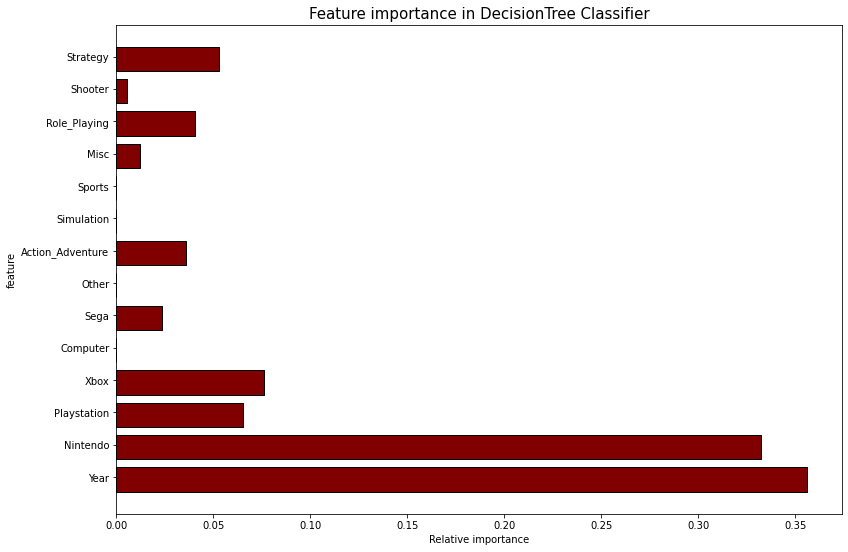

In [81]:
# create the model
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

# fit to train
clf.fit(X_train2, y_train2)

col = X_train2.columns

#modelname.feature_importance_
dc_importances = clf.feature_importances_

#plot
fig, ax = plt.subplots(figsize=(13,9)) 
width = .75 # the width of the bars 
ind = np.arange(len(dc_importances)) # the x locations for the groups
plt.barh(ind, dc_importances, width, color="maroon", edgecolor='black')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in DecisionTree Classifier', size=15)
plt.xlabel('Relative importance')
plt.ylabel('feature')

In [36]:
accuracy = clf1.score(X_train2, y_train2)

tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()

print(f'The Accuracy for our model is: \n', round(accuracy,4))
print(f'The True Positive Rate is :\n ',round(tpr,4))
print(f'The False Positive Rate is :\n ', round(fpr,4))
print(f'The True Negative Rate is :\n', round(tnr,4)) 
print(f'The False Negative Rate is :\n', round(fnr,4))

The Accuracy for our model is: 
 0.4339
The True Positive Rate is :
  0.9408
The False Positive Rate is :
  0.9155
The True Negative Rate is :
 0.0493
The False Negative Rate is :
 0.0111


In [60]:
print(f'The Baseline Accuracy is: \n', round(baseline_accuracy, 4))
print("________________________________________________")
print('Accuracy of Decision Tree Model on Train: \n', round(clf1.score(X_train2, y_train2),4))
print('Accuracy of Decision Tree Model on Validate: \n', round(clf1.score(X_validate2, y_validate2),4))
print('Accuracy of Decision Tree Model on Test: \n', round(clf1.score(X_train2, y_train2),4))

The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of Decision Tree Model on Train: 
 0.4339
Accuracy of Decision Tree Model on Validate: 
 0.4269
Accuracy of Decision Tree Model on Test: 
 0.4339


___

# KNN for Best Model

In [37]:
knn = KNeighborsClassifier()
# Now let's train the model!
knn.fit(X_train2, y_train2)
# Let's check the accuracy
accuracy = knn.score(X_train2, y_train2)
print(f"accuracy is {accuracy:.3}")

accuracy is 0.47


In [38]:
# Evaluate the model
y_pred = knn.predict(X_train2)

In [39]:
# Let's check our other classification metrics
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features
print(classification_report(y_train, y_pred))

                      precision    recall  f1-score   support

Extremely Successful       0.31      0.33      0.32      1278
   Fairly Successful       0.48      0.58      0.53      3600
    Moderate Success       0.53      0.51      0.52      3364
     Very Successful       0.26      0.04      0.07       900

            accuracy                           0.47      9142
           macro avg       0.40      0.37      0.36      9142
        weighted avg       0.45      0.47      0.45      9142



In [40]:
# Let's see how well this model performs on out of sample data!
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate2, y_validate2)))

Accuracy of KNN classifier on test set: 0.42


In [41]:
# Obtain the predictions from the model
y_pred = knn.predict(X_validate2)
y_pred[0:4]

array(['Moderate Success', 'Moderate Success', 'Moderate Success',
       'Extremely Successful'], dtype=object)

In [42]:
y_validate2.head(4)

,level_of_success
Rank,
14716,Moderate Success
11930,Moderate Success
15241,Moderate Success
1400,Extremely Successful


In [43]:
# Let's check our other classification metrics
print(classification_report(y_validate2, y_pred))

                      precision    recall  f1-score   support

Extremely Successful       0.26      0.29      0.27       534
   Fairly Successful       0.43      0.53      0.47      1509
    Moderate Success       0.48      0.46      0.47      1471
     Very Successful       0.17      0.02      0.04       405

            accuracy                           0.42      3919
           macro avg       0.33      0.32      0.31      3919
        weighted avg       0.40      0.42      0.40      3919



In [61]:
print(f'The Baseline Accuracy is: \n', round(baseline_accuracy, 4))
print("________________________________________________")
print('Accuracy of KNN Model on Train: \n',round(knn.score(X_train2, y_train2),4))
print('Accuracy of KNN Model on Validate: \n',round(knn.score(X_validate2, y_validate2),4))
print('Accuracy of KNN Model on Test: \n',round(knn.score(X_test2, y_test2),4))

The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of KNN Model on Train: 
 0.4696
Accuracy of KNN Model on Validate: 
 0.4167
Accuracy of KNN Model on Test: 
 0.4133


# Random Forest

In [44]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [45]:
# fit the model
rf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [68]:
# look at feature importance
rf_feature_imp = rf.feature_importances_
print(rf.feature_importances_)

[0.29424215 0.38027845 0.03498795 0.0170988  0.05472553 0.00911235
 0.03673004 0.02423268 0.00507072 0.02008312 0.00725681 0.03962815
 0.00599083 0.07056241]


In [47]:
# make predictions
y_pred = rf.predict(X_train2)
# estimate probability
y_pred_proba = rf.predict_proba(X_train2)

Text(0, 0.5, 'Feature')

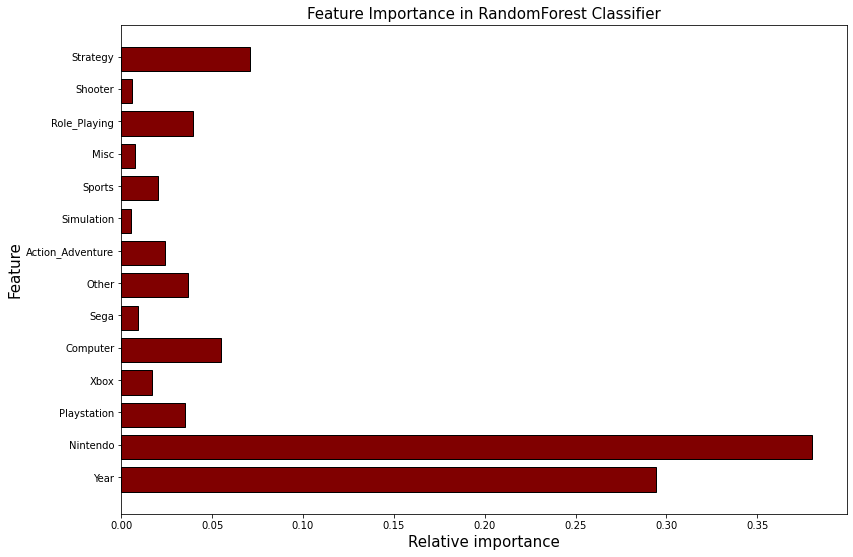

In [73]:
#plot
fig, ax = plt.subplots(figsize=(13,9)) 
width = .75 # the width of the bars 
ind = np.arange(len(rf_feature_imp)) # the x locations for the groups
plt.barh(ind, rf_feature_imp, width, color="maroon", edgecolor='black')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train2, minor=False)
plt.title('Feature Importance in RandomForest Classifier', size=15)
plt.xlabel('Relative importance', size=15)
plt.ylabel('Feature', size=15)

In [48]:
print('Accuracy of Random Forest Classifier on Train: {:.2f}'
     .format(rf.score(X_train2, y_train2)))

Accuracy of Random Forest Classifier on Train: 0.45


In [49]:
print('Accuracy of Random Forest Classifier on Validate: {:.2f}'
     .format(rf.score(X_validate2, y_validate2)))

Accuracy of Random Forest Classifier on Validate: 0.44


In [50]:
print('Accuracy of Random Forest Classifier on Test: {:.2f}'
     .format(rf.score(X_test2, y_test2)))

Accuracy of Random Forest Classifier on Test: 0.43


In [62]:
print(f'The Baseline Accuracy is: \n', round(baseline_accuracy, 4))
print("________________________________________________")
print('Accuracy of Random Forest Classifier on Train: \n', round(rf.score(X_train2, y_train2),4))
print('Accuracy of Random Forest Classifier on Validate: \n', round(rf.score(X_validate2, y_validate2),4))
print('Accuracy of Random Forest Classifier on Test: \n', round(rf.score(X_test2, y_test2),4))

The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of Random Forest Classifier on Train: 
 0.4486
Accuracy of Random Forest Classifier on Validate: 
 0.4412
Accuracy of Random Forest Classifier on Test: 
 0.432


___

## Ridge Classifier Model

In [76]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

# SelectKBest features
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [77]:
# create the model object
clf2 = RidgeClassifier(random_state=123)

# fit to train only
clf2.fit(X_train2, y_train2)

y_pred = clf2.predict(X_train2)

# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of Ridge classifier on training set:', round(clf2.score(X_train2, y_train2),2))

Accuracy of Ridge classifier on training set: 0.45


In [82]:
print(f'The Baseline Accuracy is: \n', round(baseline_accuracy, 4))
print("________________________________________________")
print('Accuracy of Ridge Classifier Model on Train: \n', round(clf2.score(X_train2, y_train2),4))
print('Accuracy of Ridge Classifier Model on Validate: \n', round(clf2.score(X_validate2, y_validate2),4))
print('Accuracy of Ridge Classifier Model on Test: \n', round(clf2.score(X_train2, y_train2),4))

The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of Ridge Classifier Model on Train: 
 0.4546
Accuracy of Ridge Classifier Model on Validate: 
 0.445
Accuracy of Ridge Classifier Model on Test: 
 0.4546


___

## SGDClassifier

In [78]:
clf3 = SGDClassifier(max_iter=1000, tol=1e-3, random_state=123)

clf3.fit(X_train2, y_train2)

y_pred = clf3.predict(X_train2)

print('Accuracy of SGD classifier on training set:', round(clf3.score(X_train2, y_train2),2))

Accuracy of SGD classifier on training set: 0.14


# Choose the Best Model

In [83]:
print(f'The Baseline Accuracy is: \n', round(baseline_accuracy, 4))
print("________________________________________________")
print('Accuracy of Logit 1 Model on Train: \n', round(logit1.score(X_train2, y_train2),4))
print("________________________________________________")
print('Accuracy of Decision Tree Model on Train: \n', round(clf1.score(X_train2, y_train2),4))
print("________________________________________________")
print('Accuracy of KNN Model on Train: \n',round(knn.score(X_train2, y_train2),4))
print("________________________________________________")
print('Accuracy of Random Forest Classifier on Train: \n', round(rf.score(X_train2, y_train2),4))
print("________________________________________________")
print('Accuracy of Ridge Classifier Model on Train: \n', round(clf2.score(X_train2, y_train2),4))


The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of Logit 1 Model on Train: 
 0.4266
________________________________________________
Accuracy of Decision Tree Model on Train: 
 0.4339
________________________________________________
Accuracy of KNN Model on Train: 
 0.4696
________________________________________________
Accuracy of Random Forest Classifier on Train: 
 0.4486
________________________________________________
Accuracy of Ridge Classifier Model on Train: 
 0.4546


### The best model is the Decision Tree

___

# Performance

In [84]:
print(f'The Baseline Accuracy is: \n', round(baseline_accuracy, 4))
print("________________________________________________")
print('Accuracy of Ridge Classifier Model on Train: \n', round(clf2.score(X_train2, y_train2),4))
print('Accuracy of Ridge Classifier Model on Validate: \n', round(clf2.score(X_validate2, y_validate2),4))
print('Accuracy of Ridge Classifier Model on Test: \n', round(clf2.score(X_train2, y_train2),4))

The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of Ridge Classifier Model on Train: 
 0.4546
Accuracy of Ridge Classifier Model on Validate: 
 0.445
Accuracy of Ridge Classifier Model on Test: 
 0.4546
